In [37]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [64]:
def load_result(file_name):
    df = pd.DataFrame()
    
    for f in file_name :
        path = os.path.join(folder,f)
        tmp = pd.read_csv(path)
        df = pd.concat([df, tmp])
    return df

def affiche_metric_by_method(name_para, df, save = False, path=None):   
    plt.figure(figsize=(15,10))
    i=1
    for yy in list_metrics_bb: 
        plt.subplot(2,4, i)
        sns.boxenplot(x=name_para, y = yy, hue='explainer', data = df)
    #     sns.lineplot(x = "models", y = "RMSE_scale", data = df_perf)
        if name_para == 'alpha':
            plt.xlabel(r"$\alpha$")
        else :
            plt.xlabel(name_para)
        i+=1
    for ax in plt.gcf().get_axes():
        ax.legend().set_visible(False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.legend(loc='upper left')
    # plt.tight_layout()
    if save :
        plt.savefig(path)
    plt.show()
    
def build_nam_for_lplot(dict_value):
    perf = ['RMSE', 'S_score']
    param = ['TW', 'RUL_early', 'alpha']
    param_values = {'alpha' : 0.5, 'RUL_early':100, 'TW':40}
    perf_parm = []
    for p in perf:
        for a in param:
            perf_parm.append((p,a))
    return perf_parm

def build_list_df_lplot(df, dict_values):
    tw_query = f'alpha=={dict_values["alpha"]} & RUL_early=={dict_values["RUL_early"]}'
    alpha_query = f'TW=={dict_values["TW"]} & RUL_early=={dict_values["RUL_early"]}'
    upper_query = f'alpha=={dict_values["alpha"]} & TW=={dict_values["TW"]}'
    
    list_df = {'TW' : df.query( tw_query),
             'alpha' : df.query( alpha_query),
             'RUL_early' : df.query(upper_query)}
    
    return list_df

def print_perf_param(perf_param, list_df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 8))
    i=1
    for ii in perf_param :
        plt.subplot(2,3, i)
        sns.lineplot(x=ii[1], y=ii[0], data=list_df[ii[1]])
        if ii[1]=='alpha':
            plt.xlabel(r'$\alpha$')
    #     plt.xlabel('Lamine')
        i+=1
    plt.tight_layout()
    # plt.savefig('out/all_performance.png')
    plt.show()

# def metrics_optimal_param(df, tw, upper,):
#     tmp = df.query('TW==30 & upper==125 & alpha==0.3')
#     return tmp[list_metrics]

def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

# Global names
folder = 'results'
columns =  ['identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'Verm_stability',
       'fidelity', 'sparsity', 'instability', 'alpha', 'upper',
       'sequence_length', 'explainer']

columns_result = ['RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'alpha',
       'rul_piecewise', 'sequence_length']

list_metrics = ['identity', 'separability', 'stability', 'coherence',
       'completness_rec', 'congruence', 'selectivity', 'accumen', 'Verm_stability',
       'fidelity_rec', 'sparsity', 'instability']

list_metrics_bb = ['Coherence', 'Congruence', 'Instability', 'Completness', 'Selectivity', 'Acumen', 'V_stability',
       'Fidelity']

list_metrics_explainer = ['identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'Verm_stability',
       'fidelity', 'sparsity', 'instability', 'explainer']

#### Chargement des données de fd001

In [66]:
name_file001 =  ['df_metric_preporcess_001.csv', 'df_metric_preporcess_001_1.csv', 'df_metric_preporcess_001_2.csv', 
'df_metric_preporcess_001_3.csv', 'df_metric_preporcess_001_4.csv', 'df_metric_preporcess_001_5.csv',
'df_metric_preporcess_001_6.csv', 'df_metric_preporcess_001_7.csv']

result_name = ['results_001_preprocess.csv', 'results_001_preprocess_1.csv', 'results_001_preprocess_2.csv', 
               'results_001_preprocess_3.csv', 'results_001_preprocess_4.csv', 'results_001_preprocess_5.csv',
               'results_001_preprocess_6.csv', 'results_001_preprocess_7.csv']


df001_metrics = load_result(name_file001)
df001_metrics = df001_metrics[columns]

df001_performance = load_result(result_name)
df001_performance = df001_performance[columns_result]
df001_performance.columns = ['RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'alpha',
       'upper', 'sequence_length']
df001_performance.drop_duplicates(subset=['alpha', 'upper', 'sequence_length'], inplace=True)
print('Dimension des resultats après supression des duplication', df001_performance.shape)

df_total001 = pd.merge(df001_metrics, df001_performance, on=['alpha', 'upper', 'sequence_length'], how='inner')
print('dimension après merge de tous les resultats de fd001', df_total001.shape)

completness = np.where(df_total001["completness"] >= 1, 1/df_total001["completness"], df_total001["completness"])
df_total001["completness"] = completness
fidelity = (df_total001["fidelity"] - min(df_total001["fidelity"]))/(max(df_total001["fidelity"])-min(df_total001["fidelity"]))
df_total001["fidelity"] = fidelity
df_total001["TW"] = df_total001["sequence_length"]

Dimension des resultats après supression des duplication (45, 7)
dimension après merge de tous les resultats de fd001 (135, 20)


#### Chargement des données de FD002

In [67]:

name_file002 =  ['df_metric_preporcess_002.csv', 'df_metric_preporcess_002_1.csv', 'df_metric_preporcess_002_2.csv', 
                 'df_metric_preporcess_002_3.csv', 'df_metric_preporcess_002_4.csv', 'df_metric_preporcess_002_5.csv']

result_name002 = ['results_002_preprocess.csv', 'results_002_preprocess_1.csv', 'results_002_preprocess_2.csv', 
                  'results_002_preprocess_3.csv', 'results_002_preprocess_4.csv', 'results_002_preprocess_5.csv']


df002_metrics = load_result(name_file002)
df002_metrics = df002_metrics[columns]

df002_performance = load_result(result_name002)
df002_performance = df002_performance[columns_result]
df002_performance.columns = ['RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'alpha',
       'upper', 'sequence_length']
df002_performance.drop_duplicates(subset=['alpha', 'upper', 'sequence_length'], inplace=True)
print('Dimension des resultats après supression des duplication', df002_performance.shape)

df_total002 = pd.merge(df002_metrics, df002_performance, on=['alpha', 'upper', 'sequence_length'], how='inner')
print('dimension après merge de tous les resultats de fd001', df_total002.shape)

completness = np.where(df_total002["completness"] >= 1, 1/df_total002["completness"],
                                          df_total002["completness"])
df_total002["completness"] = completness
fid = (df_total002["fidelity"] - min(df_total002["fidelity"]))/(max(df_total002["fidelity"])-min(df_total002["fidelity"]))
df_total002["fidelity"] = fid
df_total002["TW"] = df_total002["sequence_length"]
# df_total002.drop_duplicates(subset=['alpha', 'upper', 'sequence_length', 'explainer'], inplace=True)
# print('Dimension des resultats après supression des duplication', df_total002.shape)

Dimension des resultats après supression des duplication (45, 7)
dimension après merge de tous les resultats de fd001 (135, 20)


#### FD003

In [68]:
name_file003 =  ['df_metric_preporcess_003.csv',
 'df_metric_preporcess_003_1.csv', 'df_metric_preporcess_003_2.csv']

result_name003 = ['results_003_preprocess.csv',
 'results_003_preprocess_1.csv', 'results_003_preprocess_2.csv']


df003_metrics = load_result(name_file003)
df003_metrics = df003_metrics[columns]

df003_performance = load_result(result_name003)
df003_performance = df003_performance[columns_result]
df003_performance.columns = ['RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'alpha',
       'upper', 'sequence_length']
df003_performance.drop_duplicates(subset=['alpha', 'upper', 'sequence_length'], inplace=True)
print('Dimension des resultats après supression des duplication', df003_performance.shape)

df_total003 = pd.merge(df003_metrics, df003_performance, on=['alpha', 'upper', 'sequence_length'], how='inner')
print('dimension après merge de tous les resultats de fd001', df_total003.shape)

Com = np.where(df_total003["completness"] >= 1, 1/df_total003["completness"],
                                          df_total003["completness"])
df_total003["completness"] = Com
Fid= (df_total003["fidelity"] - min(df_total003["fidelity"]))/(max(df_total003["fidelity"])-min(df_total003["fidelity"]))
df_total003["fidelity"] = Fid
df_total003["TW"] = df_total003["sequence_length"]

Dimension des resultats après supression des duplication (45, 7)
dimension après merge de tous les resultats de fd001 (135, 20)


#### FD004

In [69]:
name_file004 =  ['df_metric_preporcess_004.csv', 'df_metric_preporcess_004_1.csv', 'df_metric_preporcess_004_2.csv', 'df_metric_preporcess_004_3.csv']

result_name004 = [ 'results_004_preprocess.csv', 'results_004_preprocess_1.csv', 'results_004_preprocess_2.csv', 'results_004_preprocess_3.csv']


df004_metrics = load_result(name_file004)
df004_metrics = df004_metrics[columns]

df004_performance = load_result(result_name004)
df004_performance = df004_performance[columns_result]
df004_performance.columns = ['RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'alpha',
       'upper', 'sequence_length']
df004_performance.drop_duplicates(subset=['alpha', 'upper', 'sequence_length'], inplace=True)
print('Dimension des resultats après supression des duplication', df004_performance.shape)

df_total004 = pd.merge(df004_metrics, df004_performance, on=['alpha', 'upper', 'sequence_length'], how='inner')
print('dimension après merge de tous les resultats de fd001', df_total004.shape)

Com = np.where(df_total004["completness"] >= 1, 1/df_total004["completness"],
                                          df_total004["completness"])
df_total004["completness"] = Com
Fid = (df_total004["fidelity"] - min(df_total004["fidelity"]))/(max(df_total004["fidelity"])-min(df_total004["fidelity"]))
df_total004["fidelity"] = Fid
df_total004["TW"] = df_total004["sequence_length"]

Dimension des resultats après supression des duplication (45, 7)
dimension après merge de tous les resultats de fd001 (135, 20)


#### Performance par (alpha TW, upper)

###### FD001 top 5 optimal parameters

In [70]:
top_performanece_001 = df001_performance.sort_values(by=['RMSE_test', 'Score_test', 'R2_test']).head(5)
top_performanece_001.to_csv('outputs/top_performance_001.csv')
top_performanece_001

,RMSE_val,RMSE_test,R2_test,Score_test,alpha,upper,sequence_length
12,10.750539,12.265851,0.857395,560.841933,0.2,130,38
9,10.986528,12.371460,0.836339,1255.523283,0.3,120,39
6,10.328501,12.518458,0.731672,24447.572381,0.5,130,39
6,11.246209,12.562232,0.886748,318.794209,0.2,130,30
15,11.990963,12.935924,0.884197,316.826878,0.3,130,30


15	11.990963	12.935924	0.884197	316.826878	0.3	130	30

###### FD002 top 5 optimal parameters

In [71]:
top_performanece_002 = df002_performance.sort_values(by=['RMSE_test', 'Score_test', 'R2_test']).head(5)
top_performanece_002.to_csv('outputs/top_performance_002.csv')
top_performanece_002

,RMSE_val,RMSE_test,R2_test,Score_test,alpha,upper,sequence_length
0,12.787621,12.340375,0.860910,3359.348104,0.2,120,40
9,14.109472,12.873922,0.894654,1316.190991,0.3,120,40
24,13.404033,12.919493,0.901167,842.786302,0.5,120,39
6,13.120558,13.025007,0.899977,671.842633,0.3,130,38
21,13.664899,13.031879,0.872201,1732.297536,0.5,125,35


6	13.120558	13.025007	0.899977	671.842633	0.3	130	38

In [72]:
top_performanece_003 = df003_performance.sort_values(by=['RMSE_test', 'Score_test', 'R2_test']).head(5)
top_performanece_003.to_csv('outputs/top_performance_003.csv')
top_performanece_003

,RMSE_val,RMSE_test,R2_test,Score_test,alpha,upper,sequence_length
6,14.570429,14.472737,0.845533,472.349097,0.5,130,40
99,14.432494,14.979864,0.811476,992.761487,0.2,130,40
105,14.979058,15.100360,0.834479,562.444930,0.3,125,40
3,14.575242,15.253357,0.785909,1270.261996,0.2,125,30
12,14.546898,15.261315,0.822195,662.681407,0.2,120,35


105	14.979058	15.100360	0.834479	562.444930	0.3	125	40

In [73]:
top_performanece_004 = df004_performance.sort_values(by=['RMSE_test', 'Score_test', 'R2_test']).head(5)
top_performanece_004.to_csv('outputs/top_performance_004.csv')
top_performanece_004

,RMSE_val,RMSE_test,R2_test,Score_test,alpha,upper,sequence_length
27,16.017869,14.643534,0.770352,13321.729883,0.5,120,38
39,16.209676,14.668663,0.820461,1748.534703,0.3,125,35
39,15.898350,14.687449,0.877731,1272.017799,0.2,125,39
48,16.136313,14.866525,0.846978,2779.373891,0.3,125,39
57,16.874581,15.103647,0.827518,5024.315453,0.5,125,39


39	15.898350	14.687449	0.877731	1272.017799	0.2	125	39

In [74]:
quality_best_param001 = df_total001.query('TW==30 & upper==130 & alpha==0.2') #0.3	130	30
quality_best_param001 = quality_best_param001[list_metrics_explainer]
quality_best_param001.to_csv('outputs/quality_best_param001.csv')
quality_best_param001

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,Verm_stability,fidelity,sparsity,instability,explainer
15,1.0,1.0,1.0,0.402267,0.036439,0.359381,0.573003,0.023548,0.694732,0.633834,0.02381,0.514811,lime
16,1.0,1.0,1.0,0.400516,0.038216,0.357609,0.810586,0.349499,1.000000,0.870278,0.02381,0.451635,shap
17,1.0,1.0,1.0,0.404732,0.042842,0.353842,0.624599,0.027112,1.000000,0.873970,0.02381,0.400000,l2x


In [75]:
quality_best_param002 = df_total002.query('TW==38 & upper==130 & alpha==0.3') #0.3	130	38
quality_best_param002 = quality_best_param002[list_metrics_explainer]
quality_best_param002.to_csv('outputs/quality_best_param002.csv')
quality_best_param002

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,Verm_stability,fidelity,sparsity,instability,explainer
72,1.0,1.0,1.0,0.275728,0.003086,0.293737,0.560664,0.155556,0.588261,0.132716,0.018797,0.320314,lime
73,1.0,1.0,1.0,0.276560,0.000886,0.295959,0.808868,0.432316,1.000000,0.555640,0.018797,0.559302,shap
74,1.0,1.0,1.0,0.298103,0.002951,0.282035,0.511405,0.027646,1.000000,0.535917,0.018797,0.600001,l2x


In [76]:
quality_best_param003 = df_total003.query('TW==40 & upper==125 & alpha==0.3') # 0.3	125	40
quality_best_param003 = quality_best_param003[list_metrics_explainer]
quality_best_param003.to_csv('outputs/quality_best_param003.csv')
quality_best_param003

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,Verm_stability,fidelity,sparsity,instability,explainer
129,1.0,1.0,1.0,0.298058,0.181289,0.245753,0.848042,0.077496,0.476655,0.315780,0.017857,0.314029,lime
130,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.867635,0.500000,1.000000,0.957618,0.000000,0.610833,shap
131,1.0,1.0,1.0,0.342984,0.174710,0.343655,0.813034,0.025188,1.000000,0.429262,0.017857,0.538462,l2x


In [77]:
quality_best_param004 = df_total004.query('TW==39 & upper==125 & alpha==0.2') # 0.2	125	39
quality_best_param004 = quality_best_param004[list_metrics_explainer]
quality_best_param004.to_csv('outputs/quality_best_param004.csv')
quality_best_param004

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,Verm_stability,fidelity,sparsity,instability,explainer
84,1.0,1.0,1.0,0.328205,0.195501,0.267142,0.673547,0.060624,0.759597,0.211134,0.018315,0.487003,lime
85,1.0,1.0,1.0,0.330125,0.281308,0.274427,0.761899,0.245248,1.000000,0.561959,0.018315,0.233869,shap
86,1.0,1.0,1.0,0.487128,0.113745,0.369504,0.694441,0.017028,1.000000,0.439800,0.018315,0.636842,l2x


##### Graphique FD001

In [78]:
list_df_Data = [df_total001, df_total002, df_total003, df_total004]
for df in list_df_Data :
       df.columns = ['Identity', 'Separability', 'Stability', 'Coherence', 'Completness',
       'Congruence', 'Selectivity', 'Acumen', 'V_stability', 'Fidelity',
       'Sparsity', 'Instability', 'alpha', 'RUL_early', 'sequence_length',
       'explainer', 'RMSE_val', 'RMSE_test', 'R2_test', 'Score_test', 'TW']

In [83]:
import os
output = 'outputs'
name_figuresTW = ['00' + str(i) + 'metric_by_method_TW.png' for i in range(1,5)]
name_figuresAlpha = ['00' + str(i) + 'metric_by_method_alpha.png' for i in range(1,5)]
name_figuresRUL = ['00' + str(i) + 'metric_by_method_upper.png' for i in range(1,5)]

In [85]:
Paths = os.path.join(output, name_figuresTW)

SyntaxError: invalid syntax (1690411367.py, line 1)

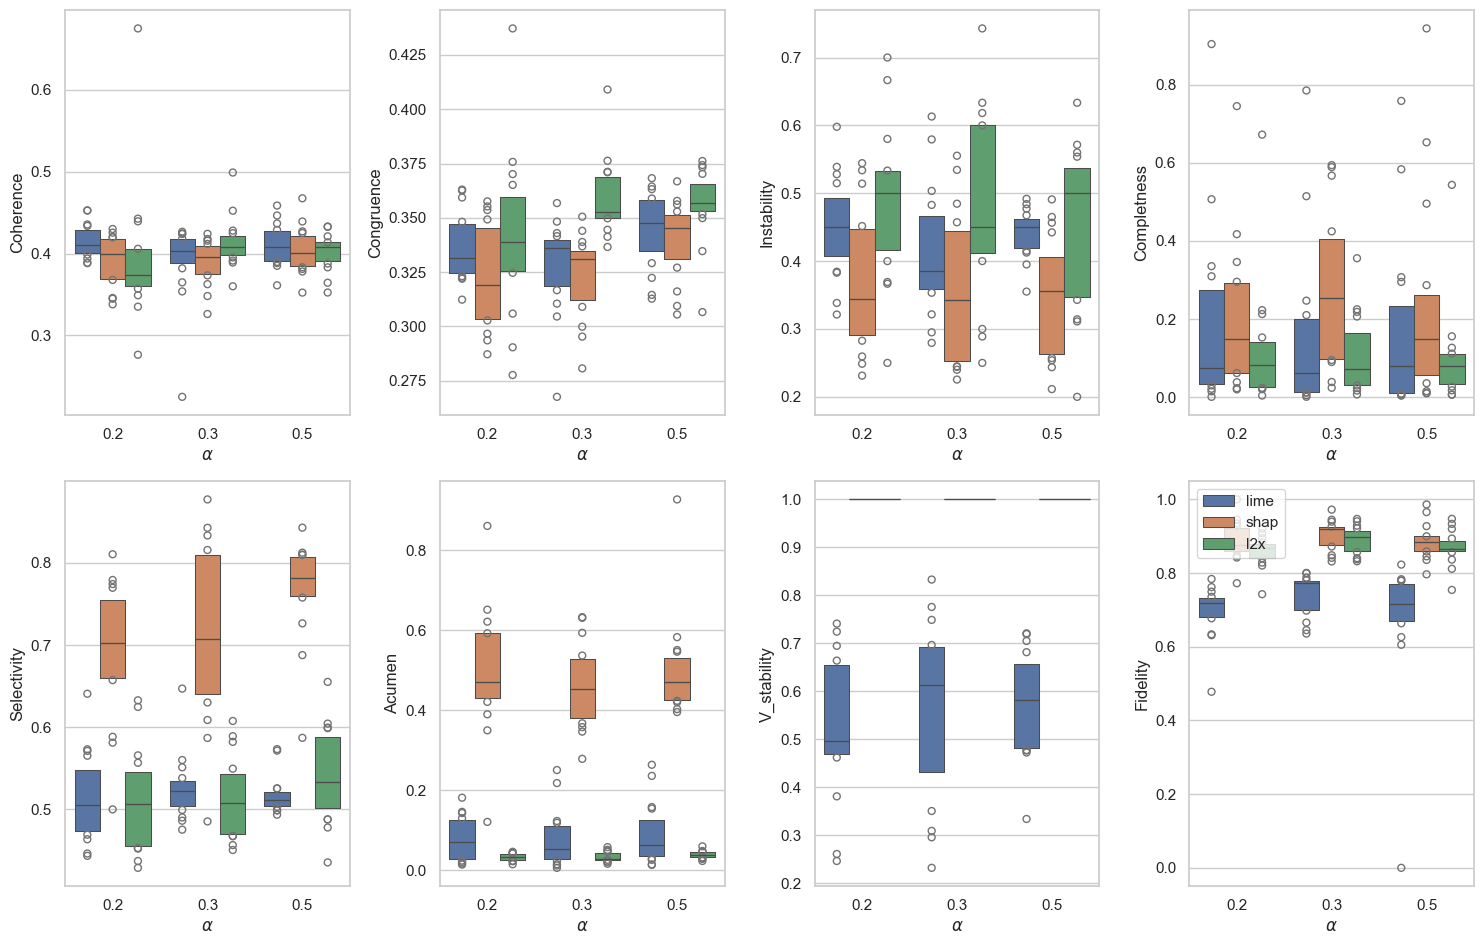

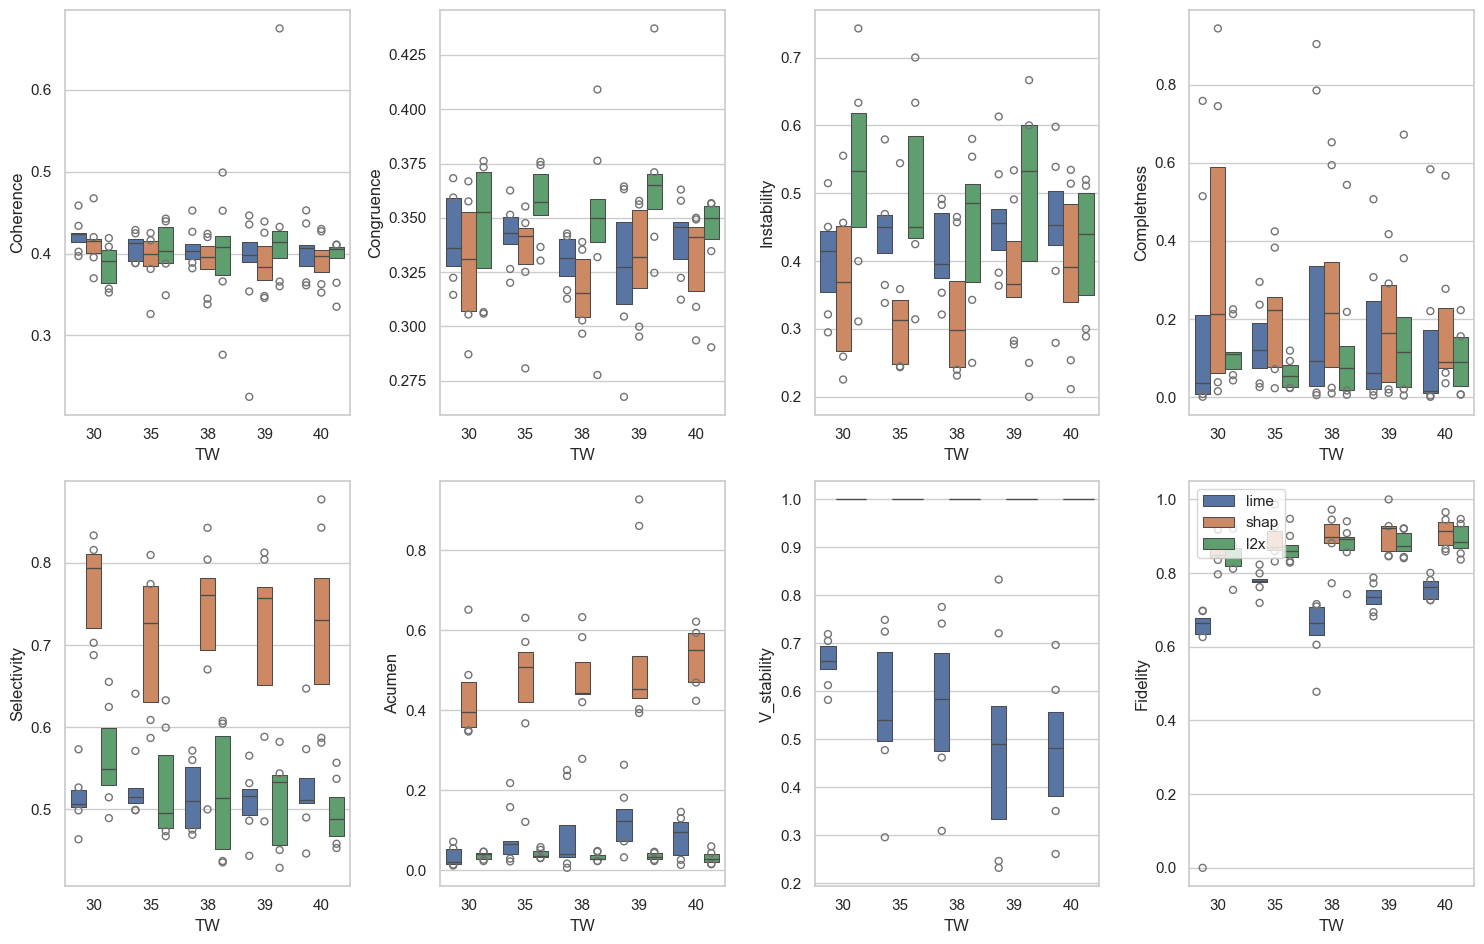

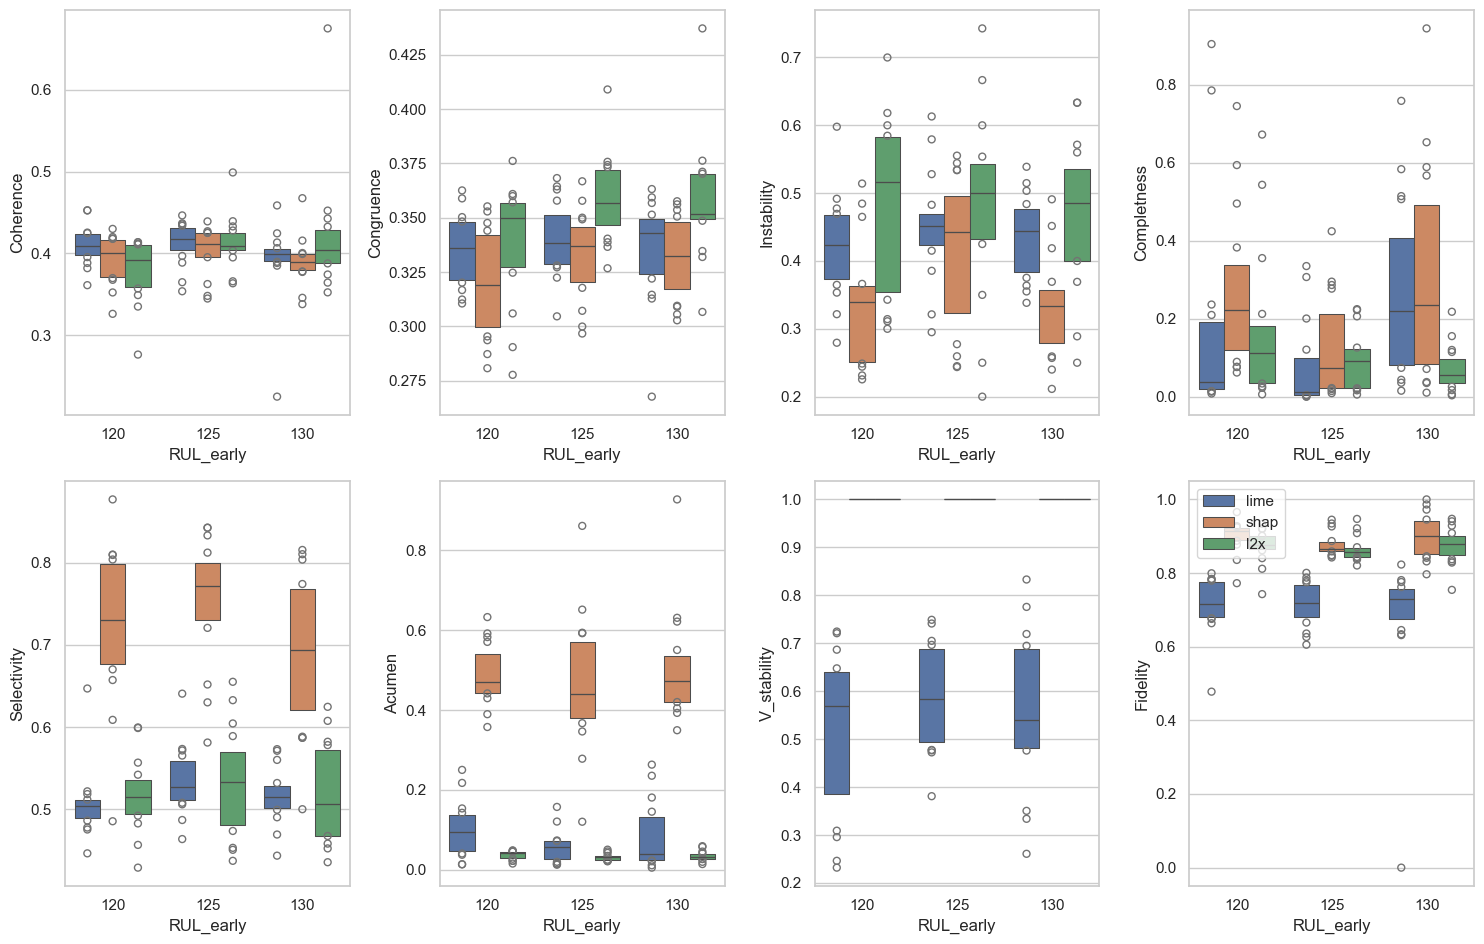

In [87]:
affiche_metric_by_method('alpha', df_total001, save=True, path=os.path.join(output, name_figuresAlpha[0]))
affiche_metric_by_method('TW', df_total001, save=True, path=os.path.join(output, name_figuresTW[0]))
affiche_metric_by_method('RUL_early', df_total001, save=True, path=os.path.join(output, name_figuresRUL[0]))

##### Graphic FD002

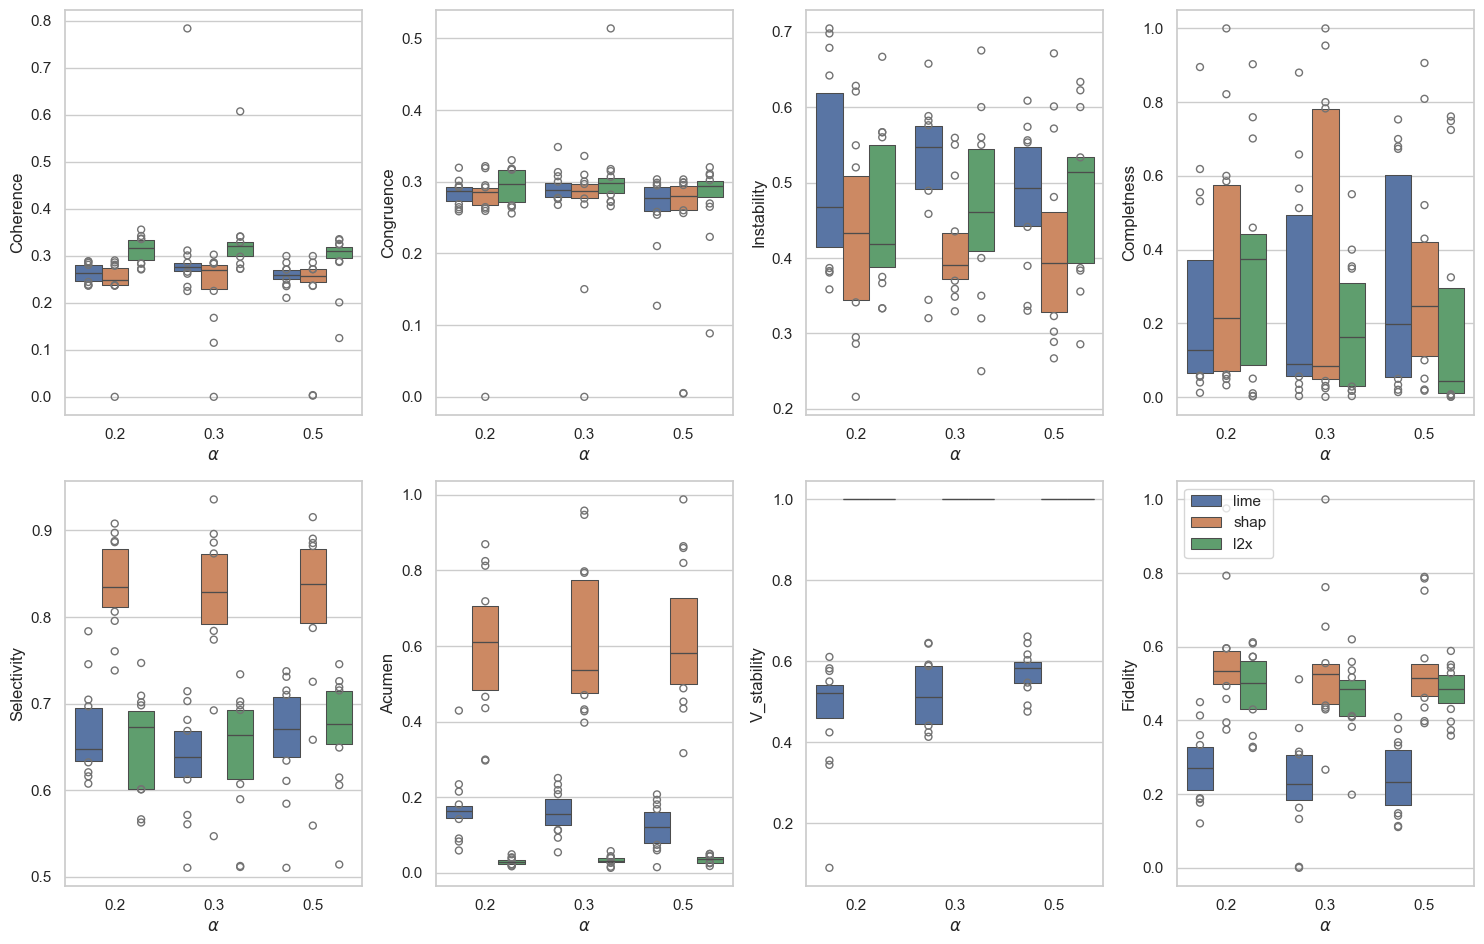

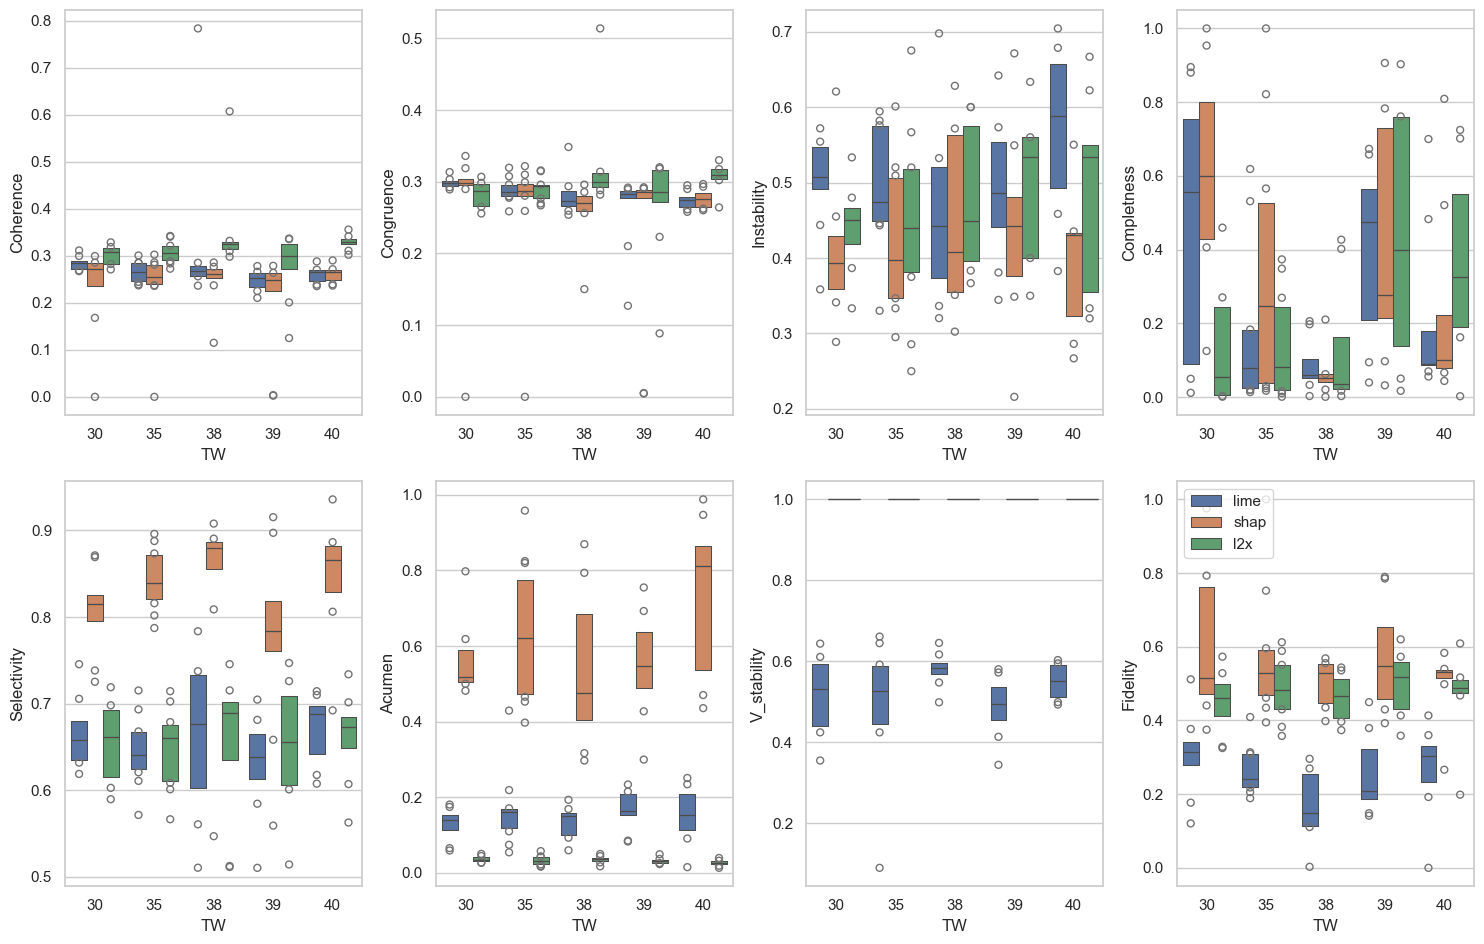

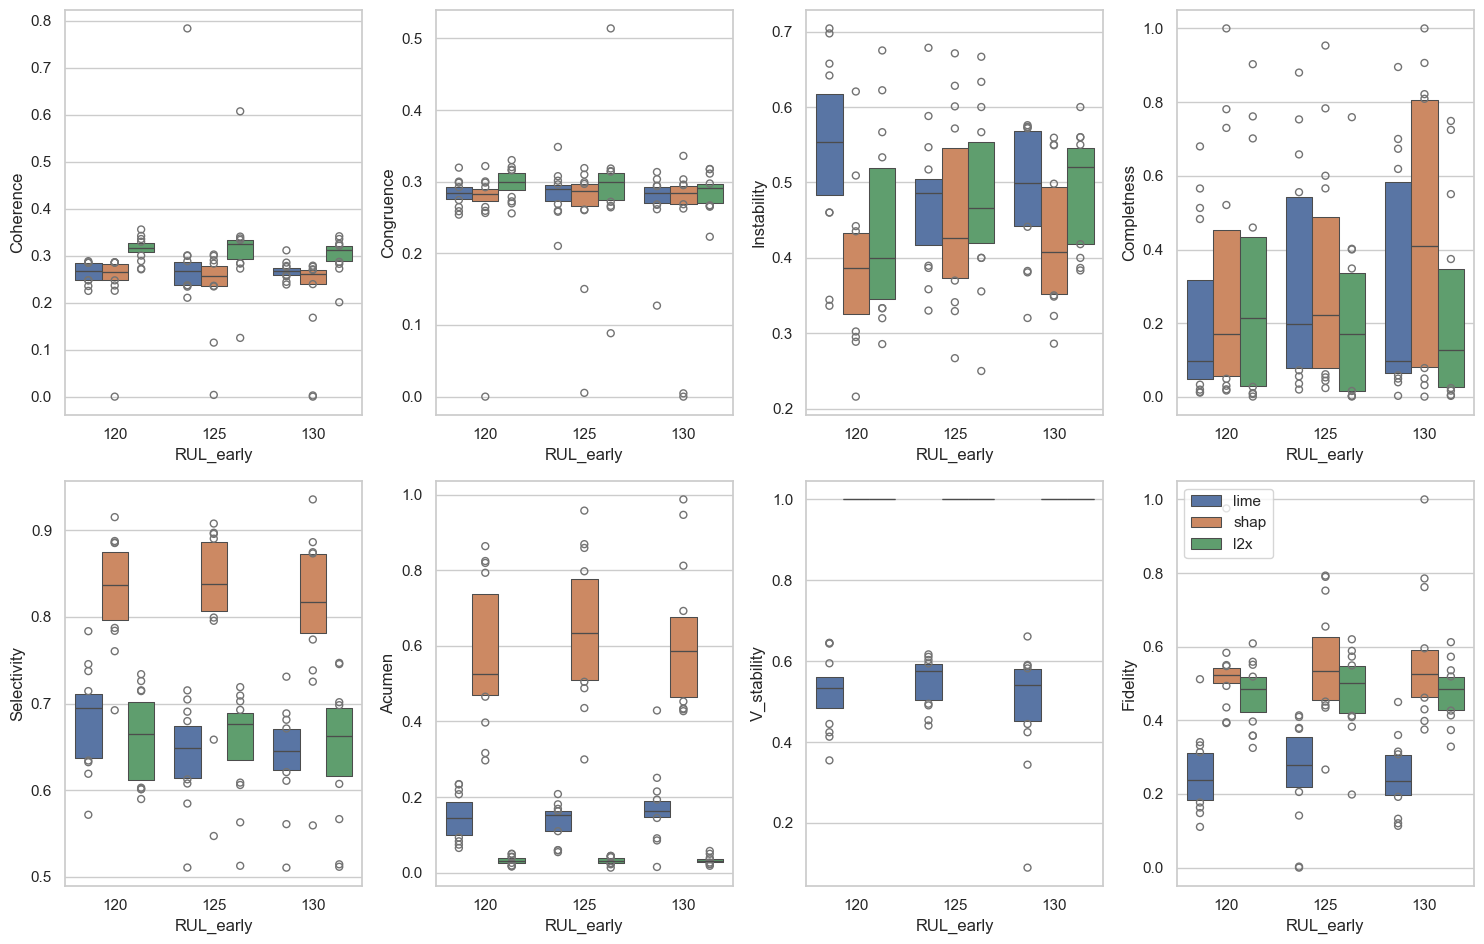

In [89]:
# affiche_metric_by_method('alpha', df_total002)
# affiche_metric_by_method('TW', df_total002)
# affiche_metric_by_method('RUL_early', df_total002)

affiche_metric_by_method('alpha', df_total002, save=True, path=os.path.join(output, name_figuresAlpha[1]))
affiche_metric_by_method('TW', df_total002, save=True, path=os.path.join(output, name_figuresTW[1]))
affiche_metric_by_method('RUL_early', df_total002, save=True, path=os.path.join(output, name_figuresRUL[1]))

#### FD003

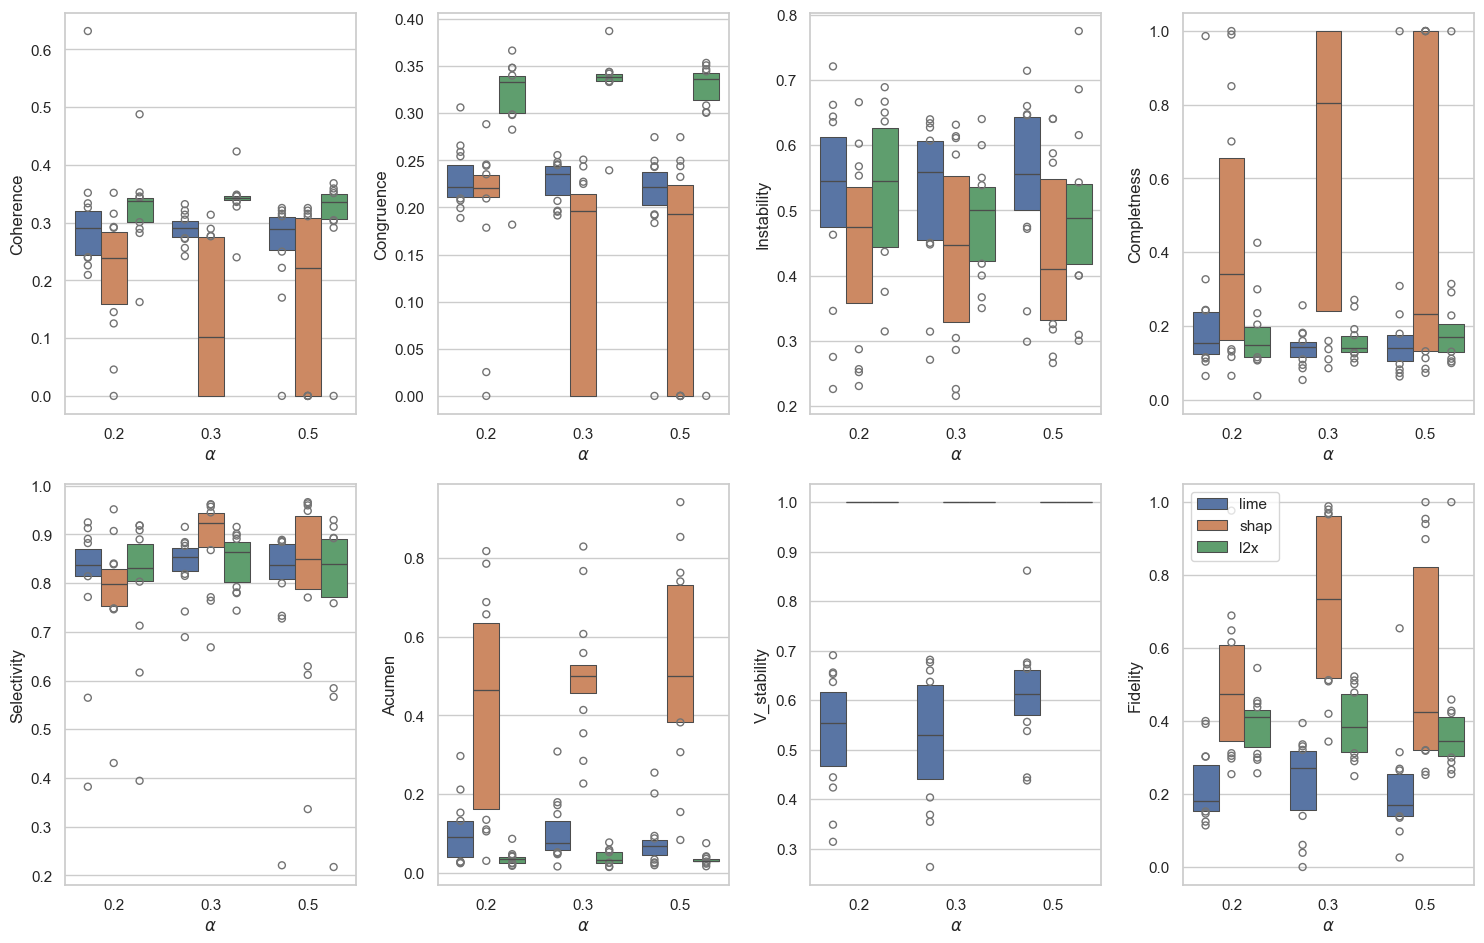

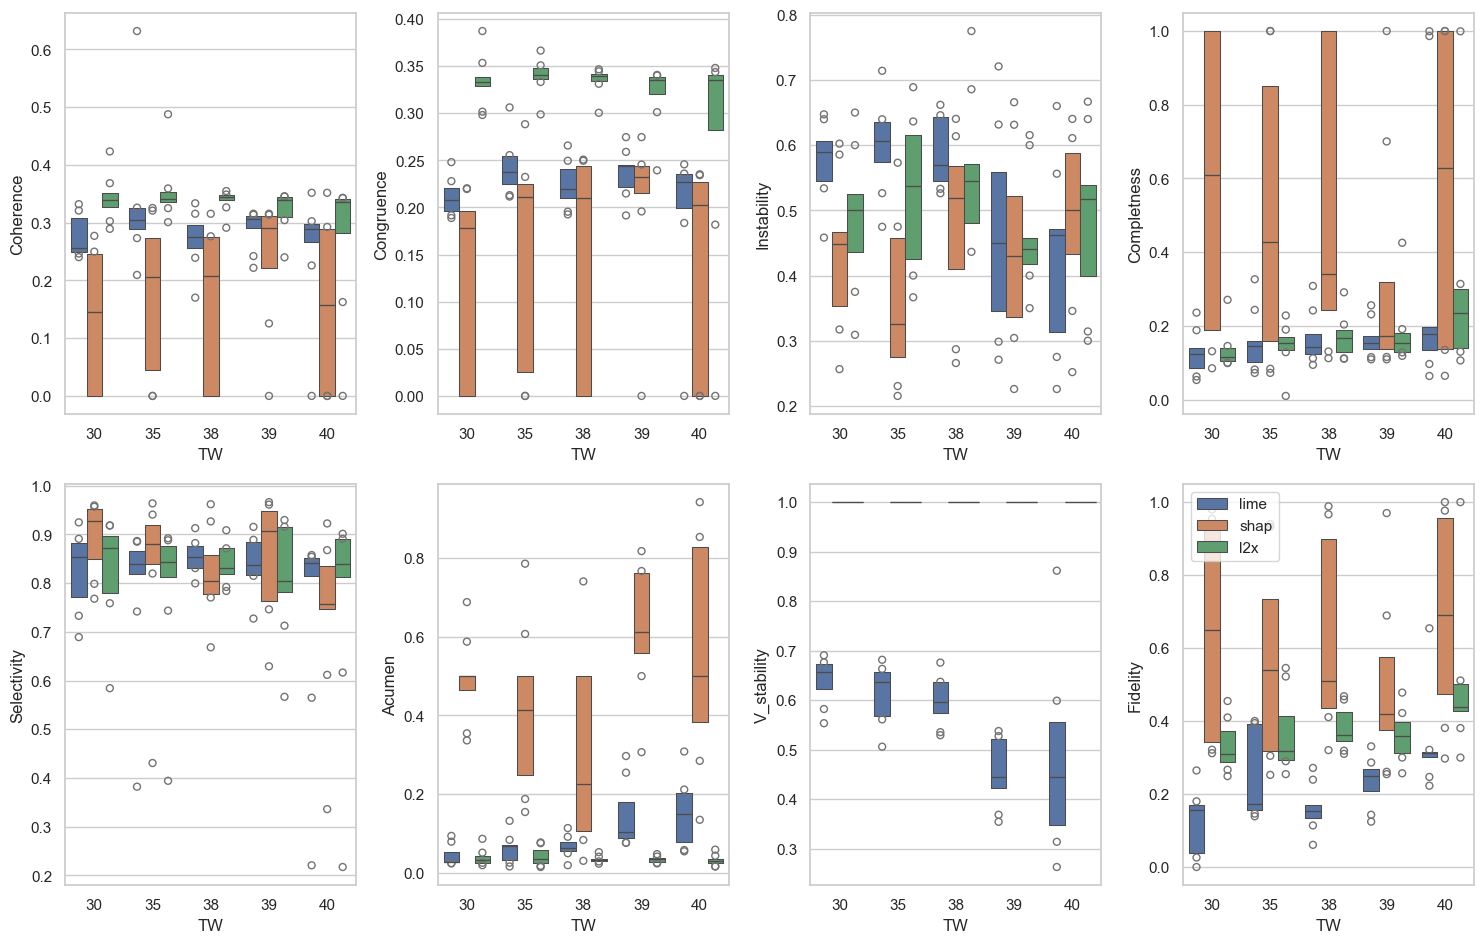

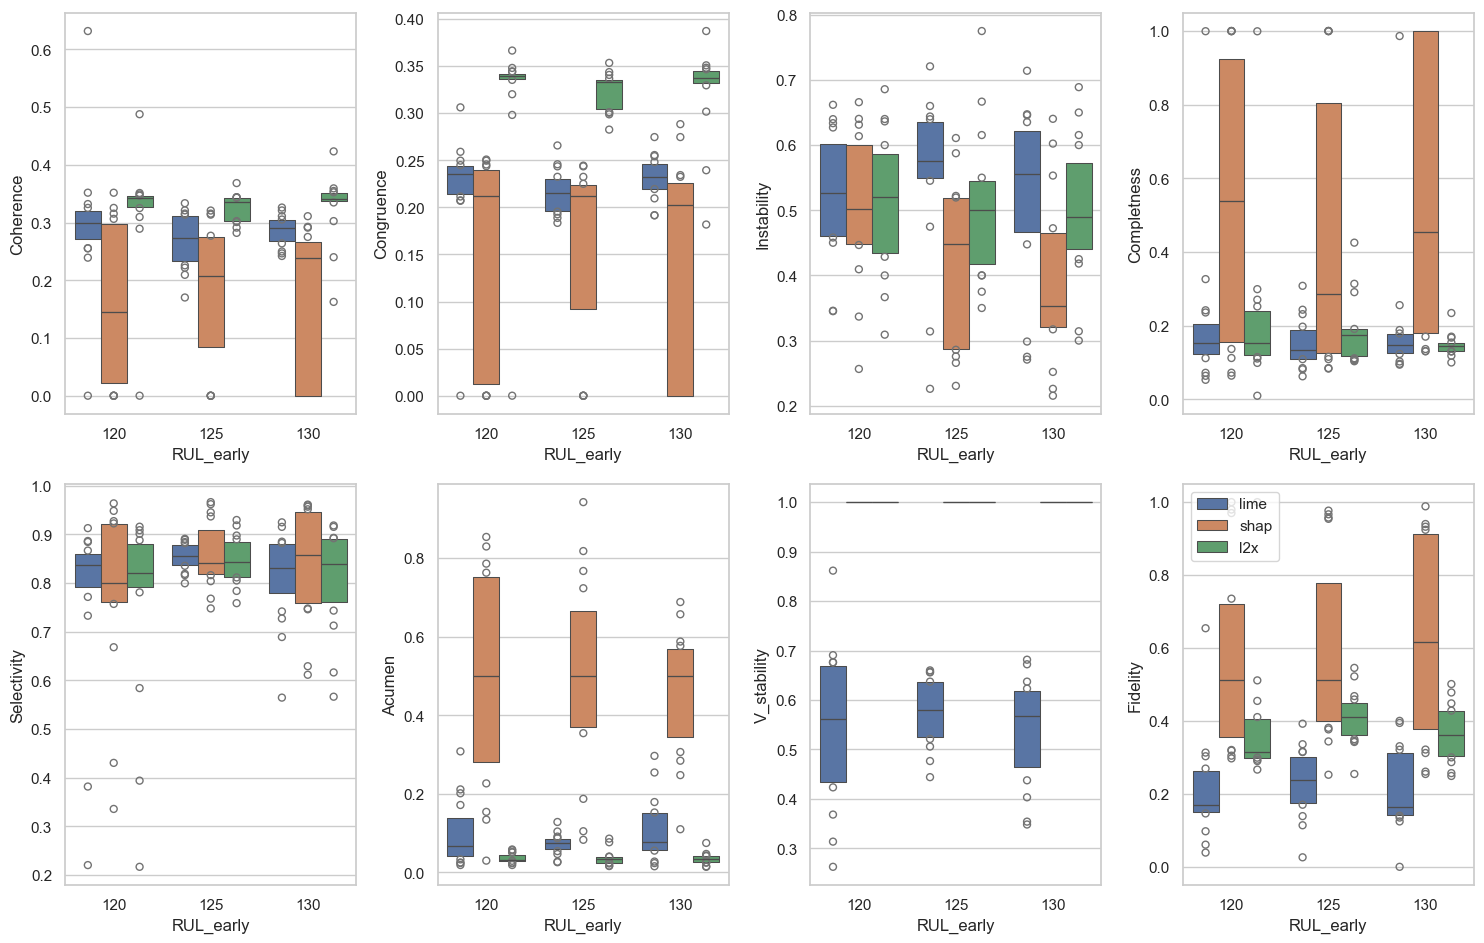

In [90]:
# affiche_metric_by_method('alpha', df_total003)
# affiche_metric_by_method('TW', df_total003)
# affiche_metric_by_method('RUL_early', df_total003)

affiche_metric_by_method('alpha', df_total003, save=True, path=os.path.join(output, name_figuresAlpha[2]))
affiche_metric_by_method('TW', df_total003, save=True, path=os.path.join(output, name_figuresTW[2]))
affiche_metric_by_method('RUL_early', df_total003, save=True, path=os.path.join(output, name_figuresRUL[2]))

#### fd004

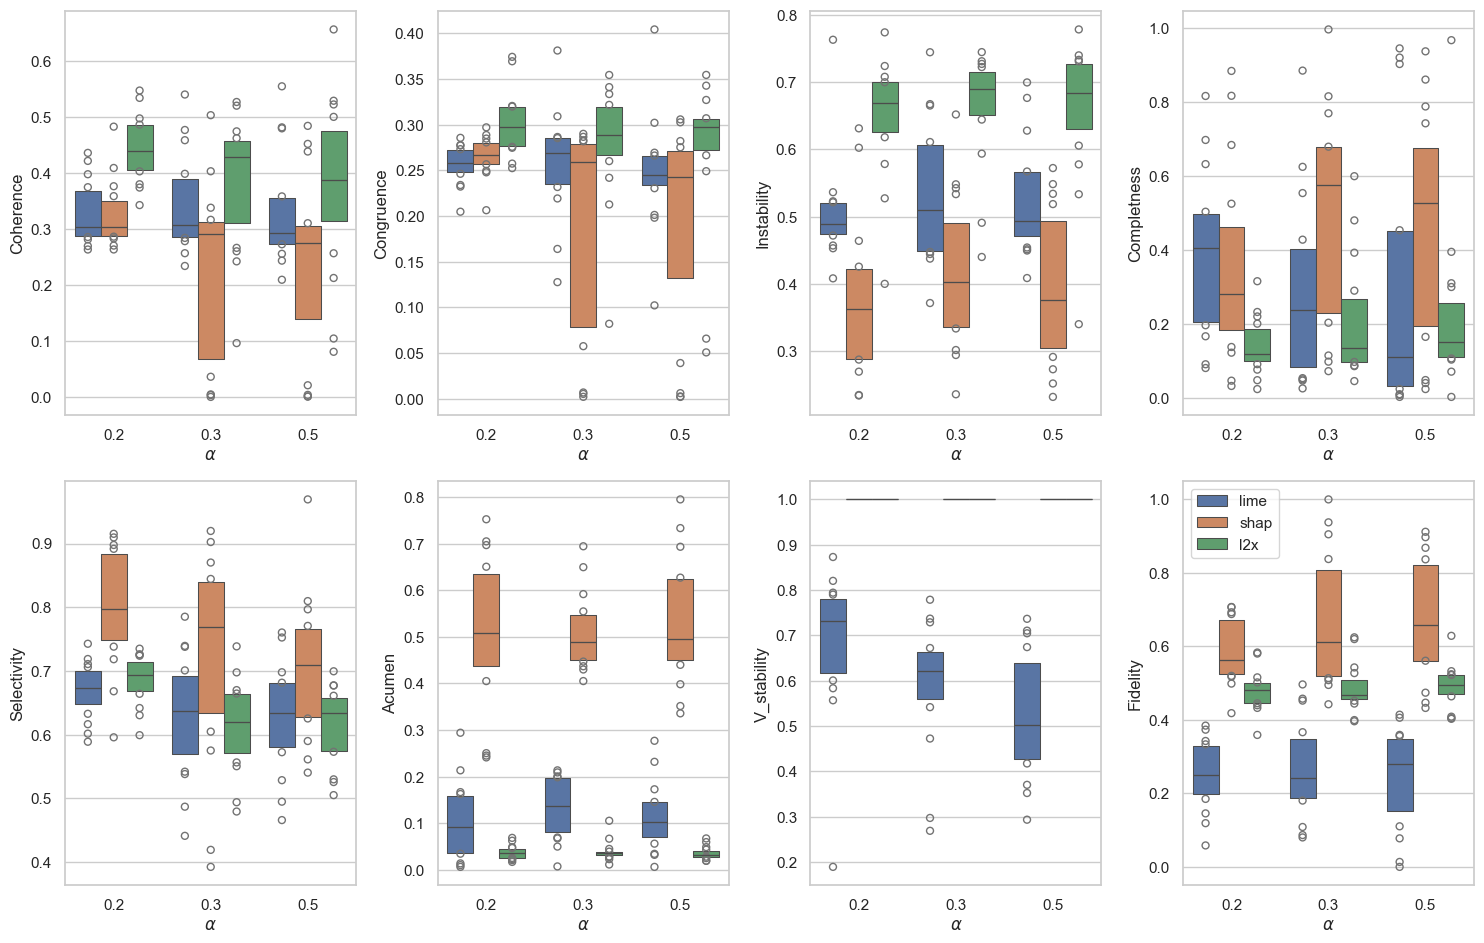

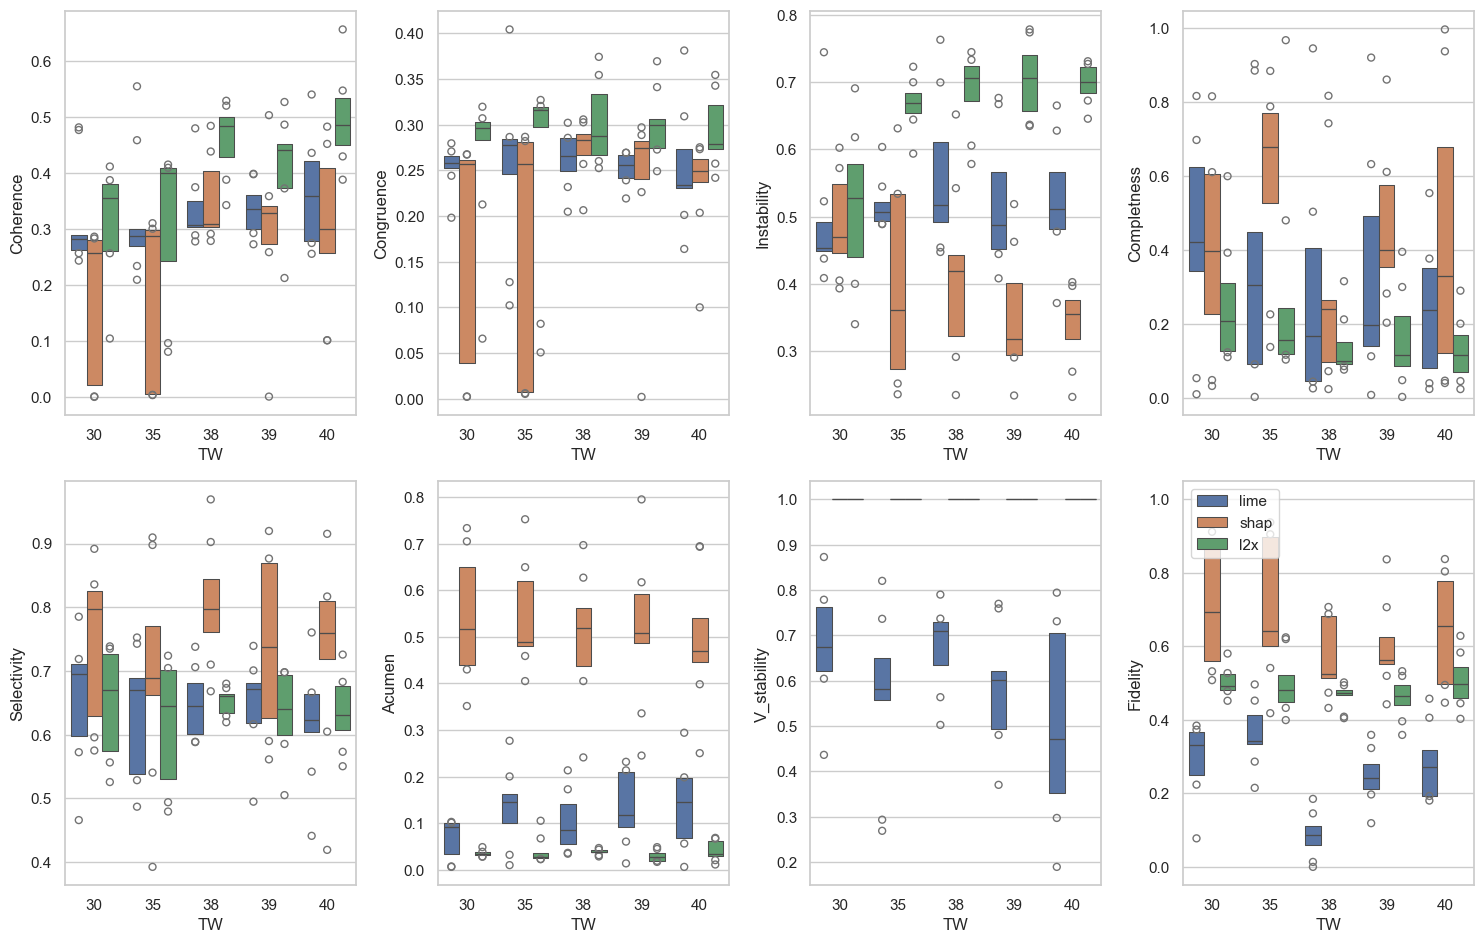

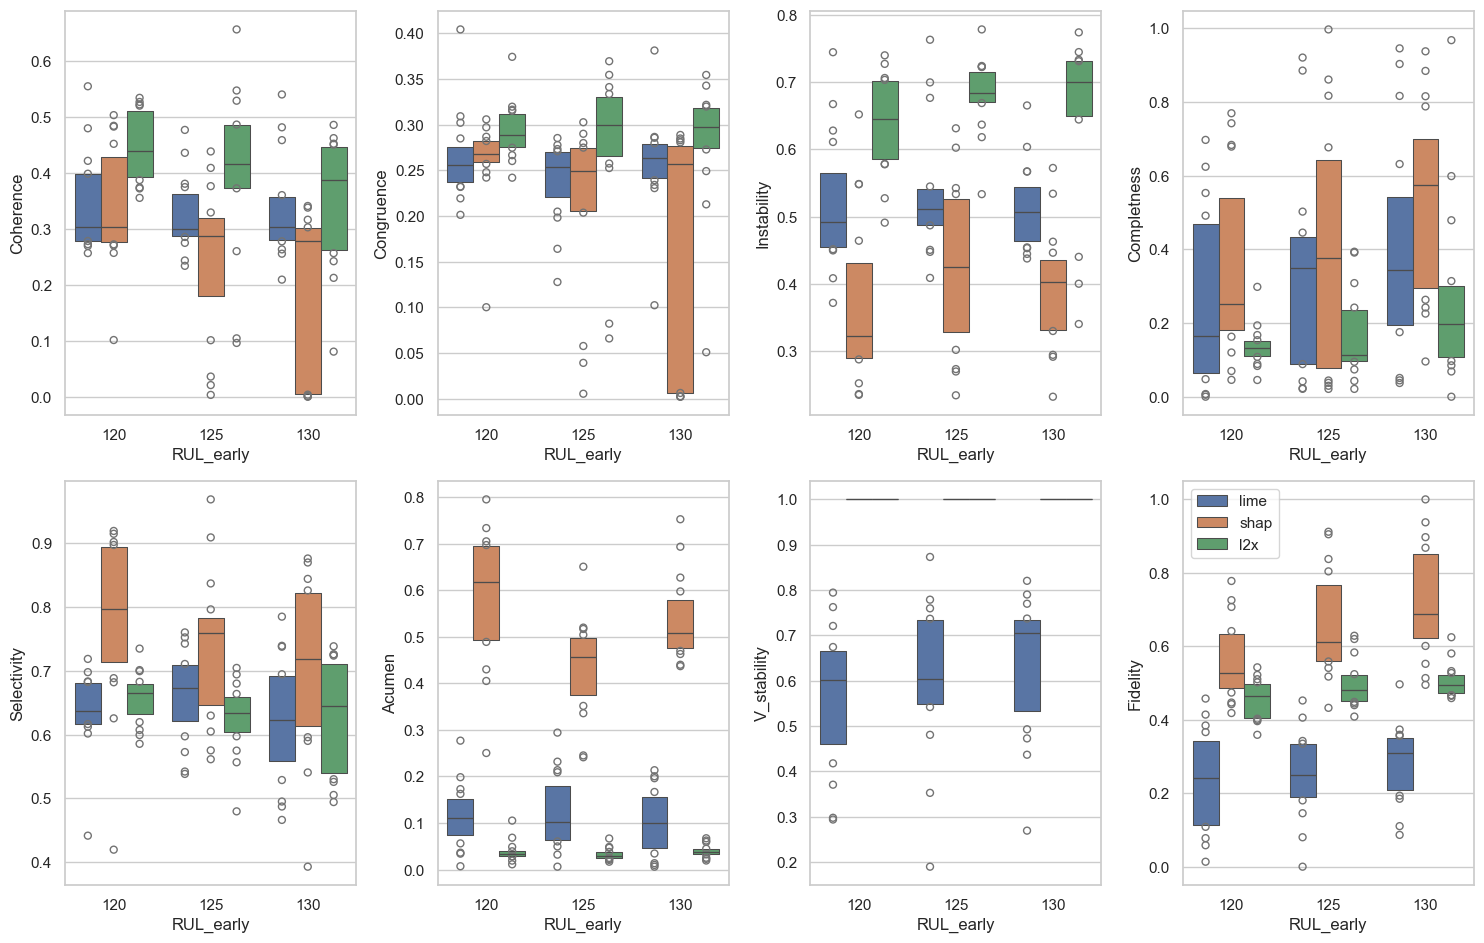

In [91]:
# affiche_metric_by_method('alpha', df_total004)
# affiche_metric_by_method('TW', df_total004)
# affiche_metric_by_method('RUL_early', df_total004)

affiche_metric_by_method('alpha', df_total004, save=True, path=os.path.join(output, name_figuresAlpha[3]))
affiche_metric_by_method('TW', df_total004, save=True, path=os.path.join(output, name_figuresTW[3]))
affiche_metric_by_method('RUL_early', df_total004, save=True, path=os.path.join(output, name_figuresRUL[3]))

#### Print Reusult

In [56]:
df001_performance.columns = ['RMSE_val', 'RMSE', 'R2', 'S_score', 'alpha', 'RUL_early',
       'TW']
df002_performance.columns = ['RMSE_val', 'RMSE', 'R2', 'S_score', 'alpha', 'RUL_early',
       'TW']
df003_performance.columns = ['RMSE_val', 'RMSE', 'R2', 'S_score', 'alpha', 'RUL_early',
       'TW']
df004_performance.columns = ['RMSE_val', 'RMSE', 'R2', 'S_score', 'alpha', 'RUL_early',
       'TW']

15	11.990963	12.935924	0.884197	316.826878	0.3	130	30
6	13.120558	13.025007	0.899977	671.842633	0.3	130	38
105	14.979058	15.100360	0.834479	562.444930	0.3	125	40
39	15.898350	14.687449	0.877731	1272.017799	0.2	125	39

In [57]:
dict_value001 = {'TW': 30, 'RUL_early': 130, 'alpha': 0.3}
dict_value002 = {'TW': 38, 'RUL_early': 130, 'alpha': 0.3}
dict_value003 = {'TW': 40, 'RUL_early': 125, 'alpha': 0.3}
dict_value004 = {'TW': 39, 'RUL_early': 125, 'alpha': 0.2}

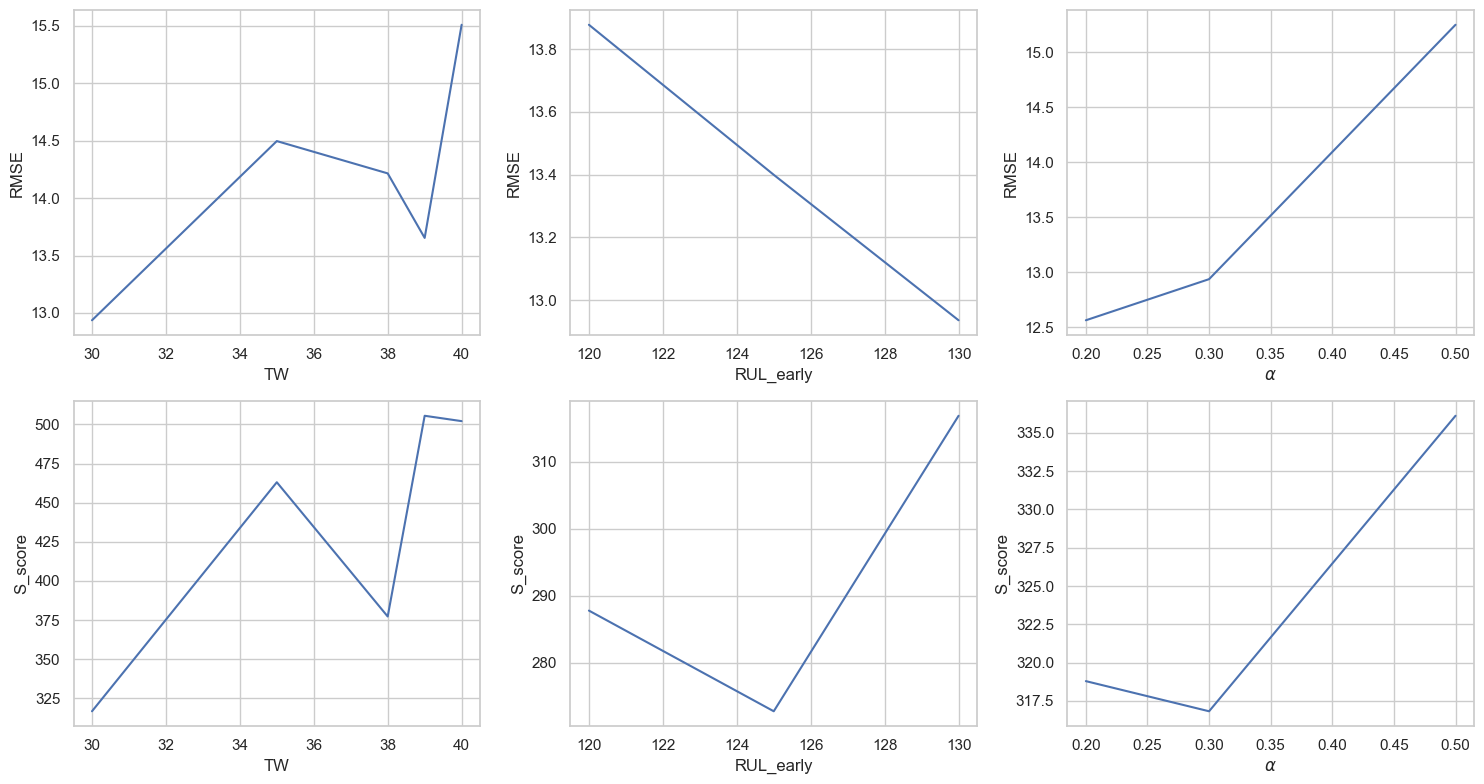

In [58]:
perf_parm001 = build_nam_for_lplot(dict_value001)
list_df001 = build_list_df_lplot(df001_performance, dict_value001)

print_perf_param(perf_parm001, list_df001)

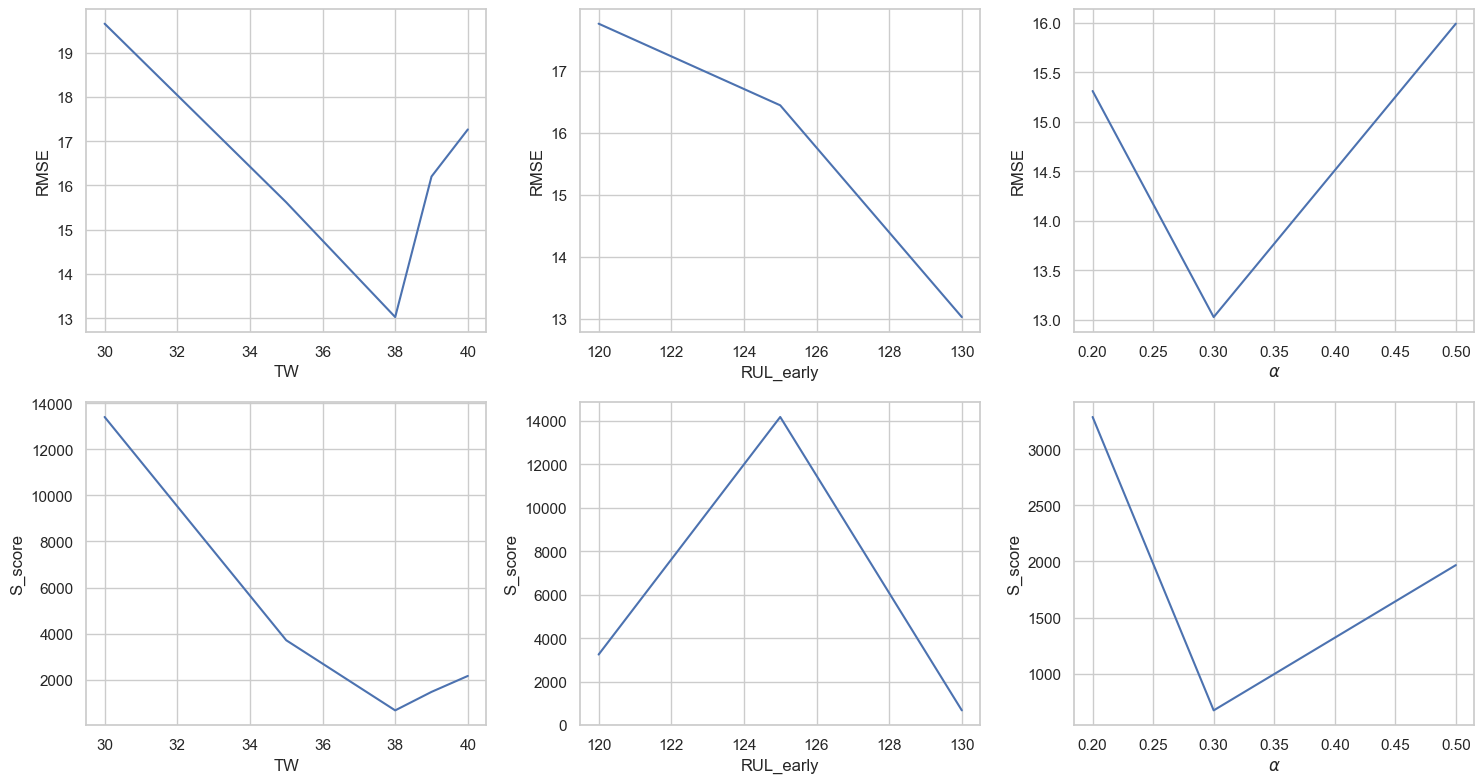

In [59]:
perf_parm002 = build_nam_for_lplot(dict_value002)
list_df002 = build_list_df_lplot(df002_performance, dict_value002)

print_perf_param(perf_parm002, list_df002)

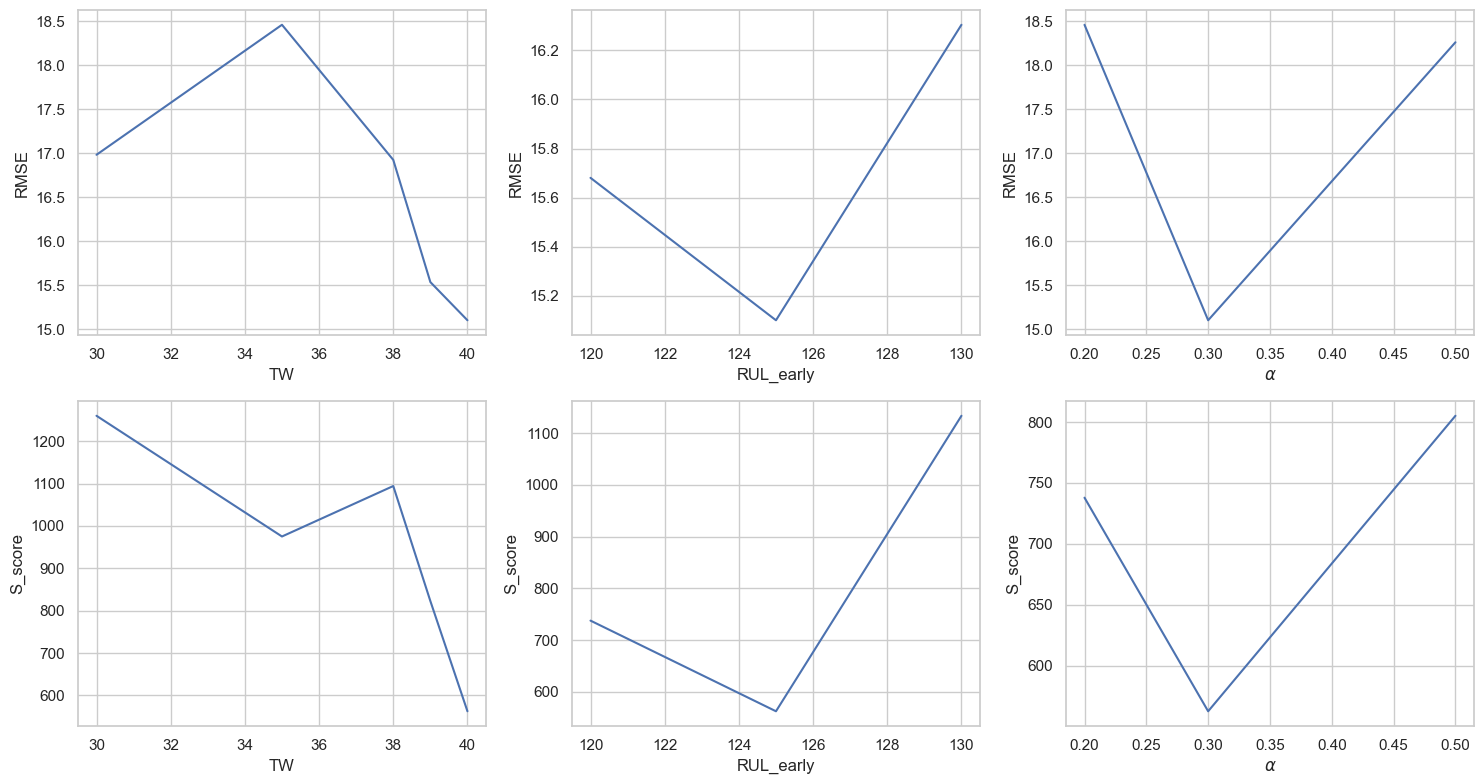

In [60]:
perf_parm003 = build_nam_for_lplot(dict_value003)
list_df003 = build_list_df_lplot(df003_performance, dict_value003)

print_perf_param(perf_parm003, list_df003)

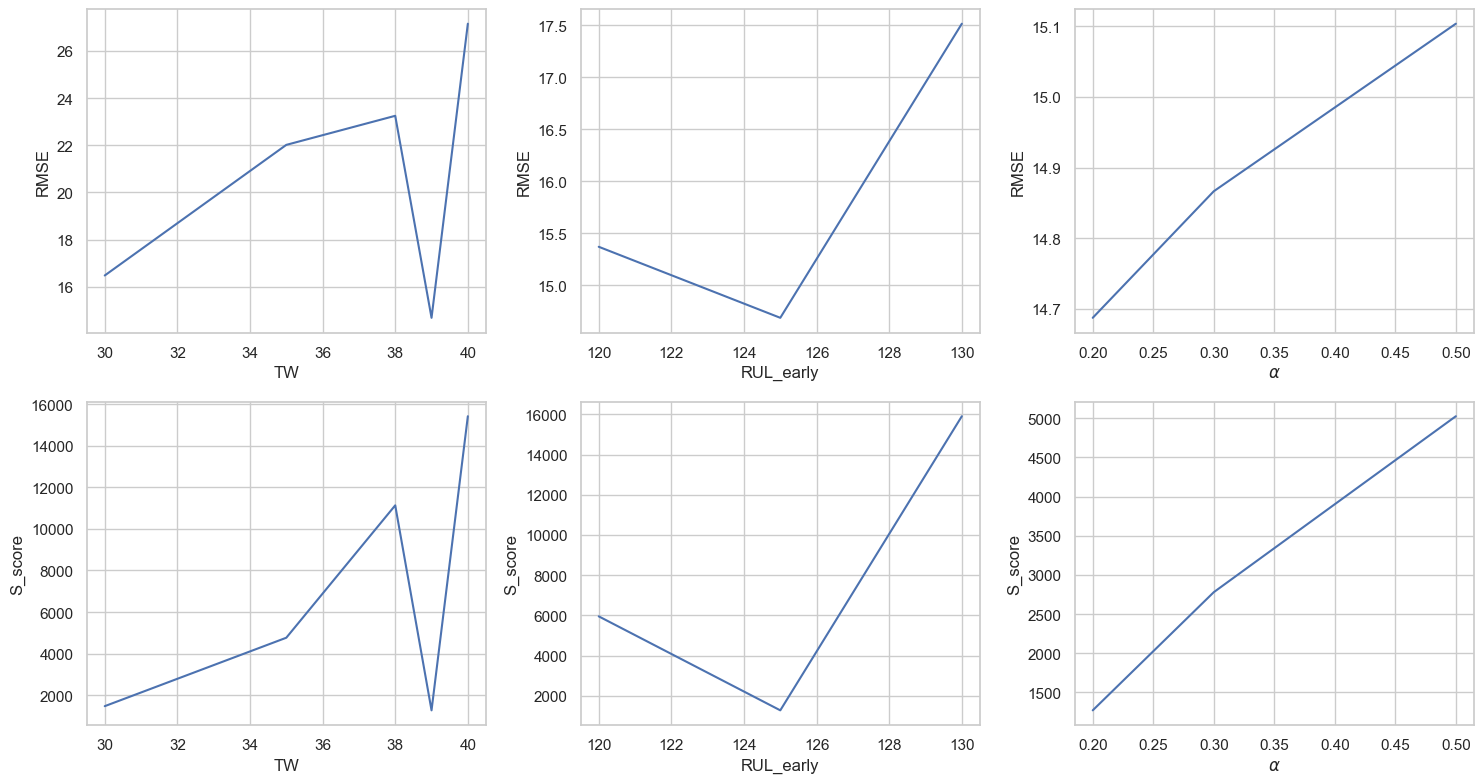

In [61]:
perf_parm004 = build_nam_for_lplot(dict_value004)
list_df004 = build_list_df_lplot(df004_performance, dict_value004)

print_perf_param(perf_parm004, list_df004)